In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
%matplotlib inline
mlp.style.use('seaborn')

In [7]:
files = ['ttbar','wmp','wpwm','zwpm','n2n2']

cs_pb = [1.258,24.6,1.6*1e-2,3.83*1e-2,3.99*1e-4]
cs = [i*1e3 for i in cs_pb]
k_f = [1.954,1.356,1.92,2.09,1.0]

cs_corr = {files[i] : cs[i]*k_f[i] for i in range(len(files))}

In [35]:
df = []

for f in files:
    df.append(pd.read_csv('~/Datasets/Test/' + f + '.csv'))
    df[-1]['type'] = files.index(f)

In [13]:
df = []

for mn2 in ['500','750','1000','1250','1400']:
    con_df = []
    
    # The maximum file number 
    for i in range(1,60):
        try:
            con_df.append(pd.read_csv('~/neutrino/datasets/old_signal/n2n2_' + str(mn2) + '/' + 'n2n2' + str(i) + '.csv'))
        except:
            pass
    
    df.append(pd.concat(con_df,ignore_index=True))

In [14]:
df[-1].head()

,ptl,etal,energyl,ptj,etaj,energyj,massj,mjj,rjj,rjl,met,n21_1,n21_2,n32_1,n32_2,infl,drfl
0,1104.900,-0.498788,1245.210,521.032,0.367960,564.013,90.5043,932.40,2.970440,0.882596,916.698,0.229465,0.309615,0.661435,0.708160,1145.530,0.366924
1,463.370,-0.589513,546.246,536.705,-0.902176,774.201,77.1665,1555.54,0.121289,2.775800,1132.200,0.388342,0.418008,0.515155,0.544950,289.301,1.434180
2,326.953,0.479720,365.302,820.111,-1.076740,1345.130,70.9080,1871.85,3.115210,1.565820,380.290,0.307497,0.516269,0.584650,0.743368,185.410,1.580950
3,576.619,0.253533,595.251,839.700,0.970868,1270.700,89.8498,1020.67,2.183250,3.044240,883.217,0.370345,0.749497,0.154525,0.624320,1006.080,2.154560
4,485.512,1.259330,924.152,755.471,-0.157772,769.641,85.3534,1227.45,2.392510,1.623280,1367.740,0.037809,0.292483,0.601904,0.742156,263.920,1.977800


In [15]:
cs_corr

NameError: name 'cs_corr' is not defined

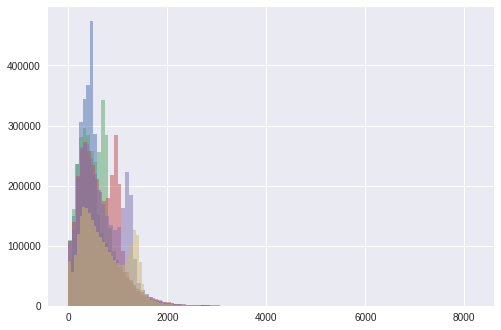

In [16]:
for f in range(5):
    plt.hist(df[f]['infl'],bins=100,alpha=0.5)
plt.show()

In [10]:
np.median(df[1]['infl'].values)

537.6705

In [39]:
dtset = pd.concat(df,ignore_index=True)

In [58]:
l = np.array([])

for i,f in enumerate(files):
    l = np.append(l,np.asarray([cs_corr[f]]*len(df[i])))

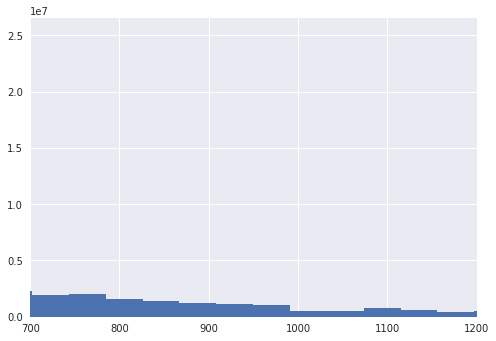

In [64]:
plt.hist(dtset['infl'],weights=l,bins=100)
plt.xlim([700,1200])
plt.show()